In [28]:
import csv
from constants import SEED
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_predict

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
albums = pd.read_csv('./embeddings/albums_embeddings_sdne_[512, 128]_150.csv', index_col='id', quoting=csv.QUOTE_ALL)
albums.embedding = albums.embedding.apply(lambda embedding: np.fromstring(embedding[1:-1], dtype=np.float32, sep=' '))

# Visualization

In [31]:
pca = PCA(n_components=2, random_state=SEED)
principal_components = pca.fit_transform(np.array(albums.embedding.tolist()))

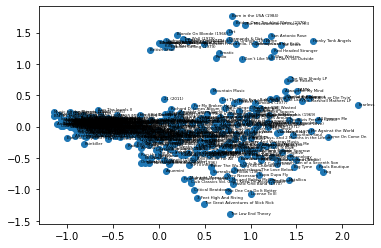

In [32]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for index, row in albums.iterrows():
    plt.annotate(row.title, (principal_components[index, 0], principal_components[index, 1]), fontsize=4)

plt.show()

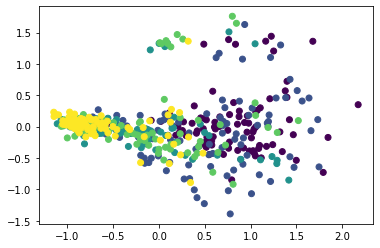

In [33]:
albums_labels = {label:index for index, label in enumerate(albums.label.unique())}
albums_colours = albums.label.map(albums_labels)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=albums_colours)
plt.show()

# Similarity

In [34]:
cos_similarity = cosine_similarity(np.array(albums.embedding.tolist()), np.array(albums.embedding.tolist()))

In [35]:
albums_index = 126
print(albums.iloc[albums_index].title)

closest_albums = cos_similarity[albums_index].argsort()[-6:][::-1]
for closest_album in closest_albums[1:]:
    print(albums.iloc[closest_album].title, cos_similarity[albums_index, closest_album])

Escape
Ray of Light (1998) 0.88348025
Are You Experienced? (1967) 0.88072854
Boy in da Corner (2003) 0.87991554
The Queen Is Dead (1986) 0.8733077
Paradise / Big Fun (1989) 0.873094


# Classification

In [26]:
X = np.array(albums.embedding.tolist())
y = albums_colours.to_numpy()

logistic_classifier = LogisticRegression(multi_class='ovr', random_state=SEED)
predicted = cross_val_predict(logistic_classifier, X, y, cv=10)

In [27]:
print(classification_report(y, predicted, target_names=albums.label.unique()))

              precision    recall  f1-score   support

     country       0.77      0.71      0.74        93
         rap       0.69      0.62      0.65       100
       metal       0.64      0.76      0.69       100
        rock       0.58      0.49      0.53        86
  electronic       0.69      0.78      0.73        99

    accuracy                           0.68       478
   macro avg       0.67      0.67      0.67       478
weighted avg       0.68      0.68      0.67       478

